In [1]:
import os 
# Go one folder back
os.chdir('..')
from Python_scripts.data_processing import *
from Python_scripts.log_likelihood import *

import glob
import numpy as np
import pymc3 as pm
import theano.tensor as tt   

subjects_dataframe, subjects_dataframe_gain, subjects_dataframe_loss = data_processing_func()

/Users/danyu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/danyu/Documents/DTU/Bachelorprojekt/Bachelor_project/Python_scripts/data_processing.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ug_1['choose'][ug_1.choose != '�ܾ�'] = 1
/Users/danyu/Documents/DTU/Bachelorprojekt/Bachelor_project/Python_scripts/data_processing.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ug_1['choose'][ug_1.choose == '

In [60]:

def generalized_log(person, N_SAMPLES = 5000):
    receivor = np.array(person['receivor'])

    choice = np.array(person['choose'])

    # np.isnan() can now be applied on "choice"
    choice = np.array([0 if np.isnan(x) else x for x in choice])


    #def mcmc(receivor, choice, N_SAMPLES):
    # Define the MCMC model
    with pm.Model() as model:
        alpha = pm.Gamma('alpha', alpha = 2, beta = 0.5)
        c = pm.Gamma('c', alpha = 7.5, beta = 1)
        a = pm.Uniform('a', lower = 0, upper = 1)
        #a = pm.Beta('a', alpha = 1, beta = 3)

        # Define the likelihood
        u = receivor - alpha * ((10 - receivor) - receivor)

        # Generalized logistic formula:  p_accept=a+((k-a)/(C+np.exp(-u*c))), where k = 1, C = 1
        p = pm.Deterministic('p', a+((1-a)/(1+np.exp(-u*c))))

        # Define the likelihood
        #obs = pm.DensityDist('obs', likelihood, observed=data)
        observed = pm.Bernoulli('obs', p, observed = choice)

        # Using Metropolis Hastings Sampling
        step = pm.Metropolis()

        # Sample from the posterior using the sampling method
        trace = pm.sample(N_SAMPLES, step=step);

        # Sample from the posterior using MCMC
        #trace = pm.sample(5000, tune=1000, target_accept=0.9)

    # Print the summary of the posterior distribution
    #pm.summary(trace)
    return trace


In [61]:
trace = generalized_log(subjects_dataframe_gain[0], N_SAMPLES = 5000)

/Users/danyu/opt/anaconda3/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [a]
>Metropolis: [c]
>Metropolis: [alpha]
CompoundStep
>Metropolis: [a]
>Metropolis: [c]
>Metropolis: [alpha]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 27 seconds.
The number of effective samples is smaller than 10% for some parameters.


In [58]:

import numpy as np

# Create a PyMC3 model
with pm.Model() as model:
    # Define a Beta distribution with alpha=2 and beta=2
    p = pm.Beta('p', alpha=2, beta=2)
    
    # Draw 1000 samples from the distribution
    samples = pm.sample(1000, chains=1, random_seed=123)
    
# Print the mean and standard deviation of the samples
print('Mean:', np.mean(samples['p']))
print('Std Dev:', np.std(samples['p']))

/Users/danyu/opt/anaconda3/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Mean: 0.524980198433451
Std Dev: 0.22195857883067074


(array([ 22.,  75., 103., 114., 133., 152., 141., 124.,  88.,  48.]),
 array([0.01712923, 0.11358768, 0.21004614, 0.30650459, 0.40296304,
        0.49942149, 0.59587994, 0.69233839, 0.78879685, 0.8852553 ,
        0.98171375]),
 <BarContainer object of 10 artists>)

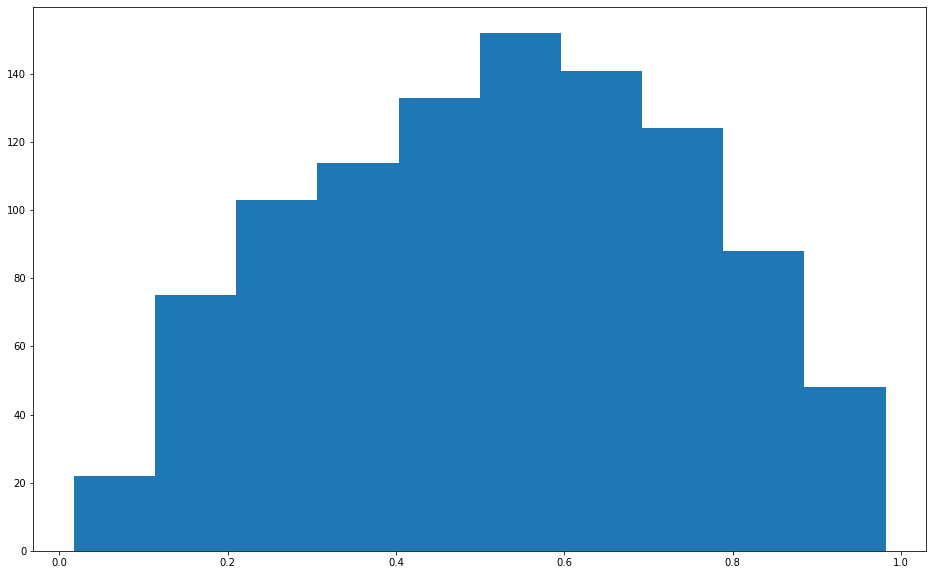

In [62]:
plt.hist(samples['p'])

# Plots

In [63]:
alpha_samples = trace["alpha"]
c_samples = trace["c"]
a_samples = trace["a"]

<ipython-input-64-f426d783fc0d>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(212)


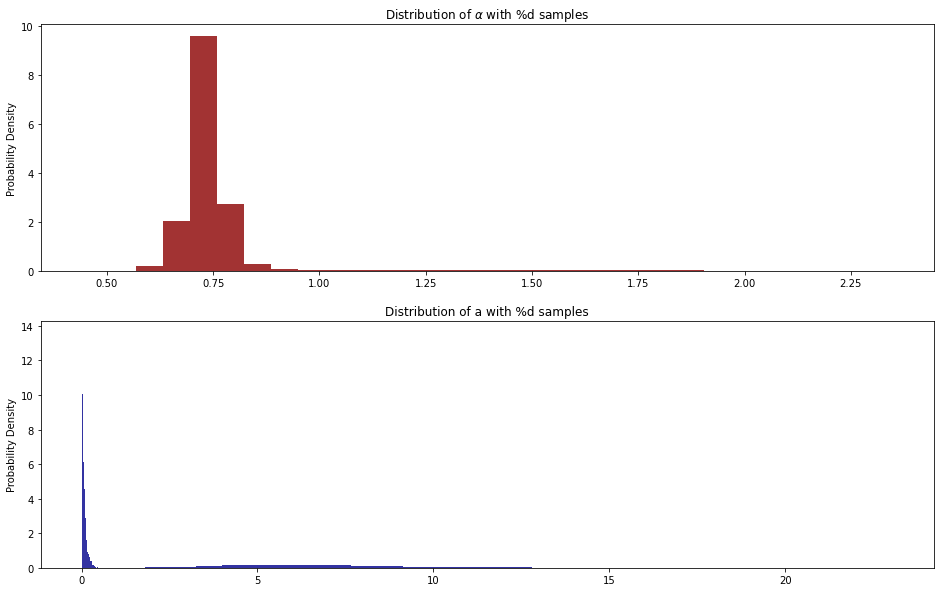

In [64]:
from IPython.core.pylabtools import figsize

figsize(16, 10)

plt.subplot(211)
plt.title(r"""Distribution of $\alpha$ with %d samples""")

plt.hist(alpha_samples, histtype='stepfilled', 
         color = 'darkred', bins=30, alpha=0.8, density=True);
plt.ylabel('Probability Density')


plt.subplot(212)
plt.title(r"""Distribution of c with %d samples""" )
plt.hist(c_samples, histtype='stepfilled', 
         color = 'darkblue', bins=30, alpha=0.8, density=True)
plt.ylabel('Probability Density');

plt.subplot(212)
plt.title(r"""Distribution of a with %d samples""" )
plt.hist(a_samples, histtype='stepfilled', 
         color = 'darkblue', bins=30, alpha=0.8, density=True)
plt.ylabel('Probability Density');

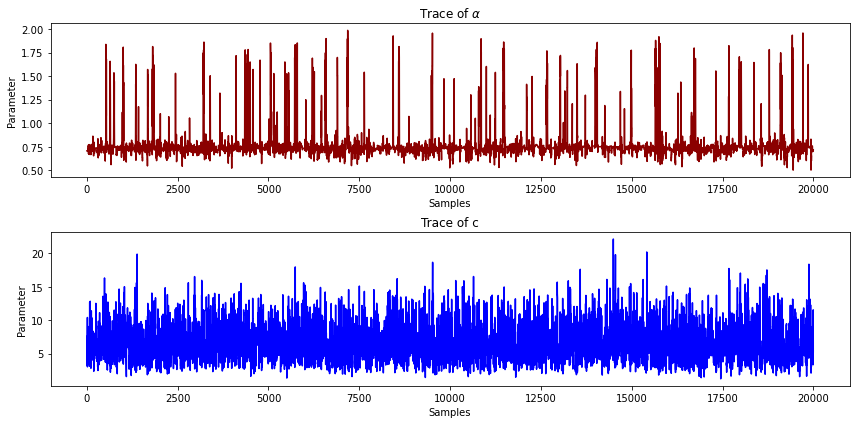

In [ ]:
figsize(12, 6)

# Plot alpha trace
plt.subplot(211)
plt.title(r'Trace of $\alpha$')
plt.plot(alpha_samples, color = 'darkred')
plt.xlabel('Samples'); plt.ylabel('Parameter');

# Plot beta trace
plt.subplot(212)
plt.title(r'Trace of c')
plt.plot(c_samples, color='b')
plt.xlabel('Samples'); plt.ylabel('Parameter');
plt.tight_layout(h_pad=0.8)

# Generalized vs. log

In [35]:
def multimodels(person, N_SAMPLES = 5000):
    receivor = np.array(person['receivor'])

    choice = np.array(person['choose'])

    # np.isnan() can now be applied on "choice"
    choice = np.array([0 if np.isnan(x) else x for x in choice])


    #def mcmc(receivor, choice, N_SAMPLES):
    # Define the MCMC model
    with pm.Model() as model:
        alpha = pm.Gamma('alpha', alpha = 2, beta = 0.5)
        c = pm.Gamma('c', alpha = 7.5, beta = 1)
        a = pm.Uniform('a', lower = 0, upper = 0.99)
        switch = pm.Bernoulli('model_switch', p=0.5)


        # Define the likelihood
        u = receivor - alpha * ((10 - receivor) - receivor)

        model1 = tt.exp(u * c) / (1 + tt.exp(u * c))
        model2 = a+((1-a)/(1+tt.exp(-u*c)))
        # Generalized logistic formula:  p_accept=a+((k-a)/(C+np.exp(-u*c))), where k = 1, C = 1
        p = pm.Deterministic('p', model1*switch + model2*(1 - switch))

        # Define the likelihood
        #obs = pm.DensityDist('obs', likelihood, observed=data)
        observed = pm.Bernoulli('obs', p, observed = choice)

        # Using Metropolis Hastings Sampling
        step = pm.Metropolis()

        # Sample from the posterior using the sampling method
        trace = pm.sample(N_SAMPLES, step=step);

        # Sample from the posterior using MCMC
        #trace = pm.sample(5000, tune=1000, target_accept=0.9)

    # Print the summary of the posterior distribution
    #pm.summary(trace)
    return trace


In [29]:
trace_multimodels = multimodels(subjects_dataframe_gain[9], N_SAMPLES = 5000)

/Users/danyu/opt/anaconda3/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [model_switch]
>Metropolis: [a]
>Metropolis: [c]
>Metropolis: [alpha]
CompoundStep
>Metropolis: [model_switch]
>Metropolis: [a]
>Metropolis: [c]
>Metropolis: [alpha]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 23 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [30]:
pm.summary(trace_multimodels)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/danyu/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
model_switch,0.962,0.192,1.000,1.000,0.004,0.003,2286.0,20000.0,1.0
alpha,1.355,0.291,0.873,1.849,0.005,0.004,3118.0,3339.0,1.0
c,7.827,2.731,2.989,12.700,0.042,0.029,4276.0,4677.0,1.0
a,0.482,0.295,0.000,0.932,0.005,0.004,3067.0,2828.0,1.0
p[0],0.002,0.011,0.000,0.000,0.000,0.000,3114.0,2749.0,1.0
p[1],0.006,0.026,0.000,0.025,0.000,0.000,2915.0,3767.0,1.0
p[2],1.000,0.000,1.000,1.000,0.000,0.000,3858.0,5223.0,1.0
p[3],0.002,0.011,0.000,0.000,0.000,0.000,2978.0,2772.0,1.0
p[4],0.989,0.033,0.947,1.000,0.000,0.000,3542.0,5005.0,1.0
p[5],0.006,0.026,0.000,0.025,0.000,0.000,2915.0,3767.0,1.0


(array([  768.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 19232.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

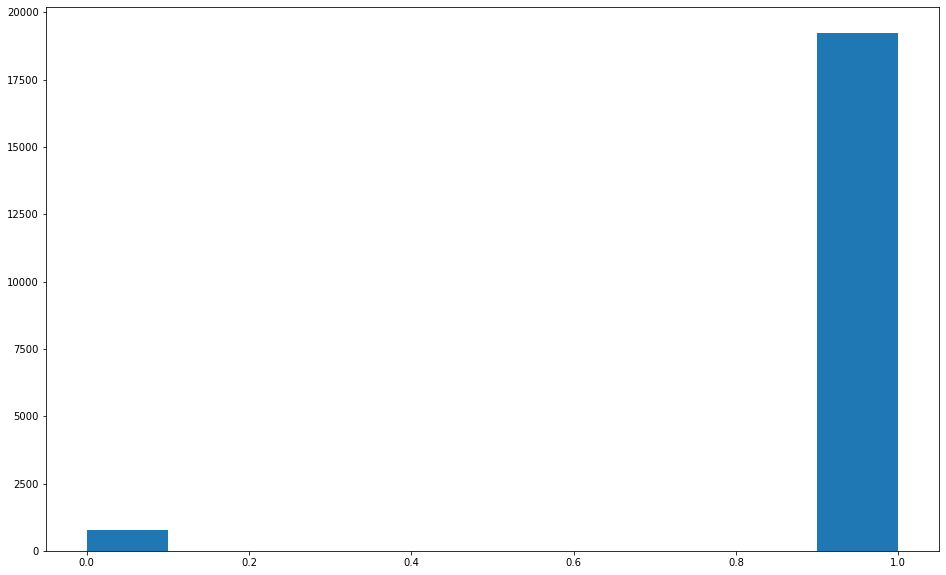

In [31]:
plt.hist(trace_multimodels['model_switch'])

In [36]:
trace_multimodels_23 = multimodels(subjects_dataframe_gain[23], N_SAMPLES = 5000)

SamplingError: Initial evaluation of model at starting point failed!
Starting values:
{'alpha_log__': array(1.38629436), 'c_log__': array(2.01490302), 'a_interval__': array(0.), 'model_switch': array(0)}

Initial evaluation results:
alpha_log__    -0.61
c_log__         0.08
a_interval__   -1.39
model_switch   -0.69
obs             -inf
Name: Log-probability of test_point, dtype: float64